In [ ]:
import pandas as pd
import numpy as np
import sympy as sp
import os 
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [ ]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Setup working directory and load data
DIR = '/content/drive/My Drive/Colab Notebooks/OddSem2020MAHE'
#FILENAME = 'Data/president_heights.csv'
#os.chdir(DIR)
#df = pd.read_csv(FILENAME) # read the csv file on to a dataframe 

In [ ]:
def plotVectors(X, vectornames = ''):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('Vectors in standard positions')
  origin = np.array([np.zeros(len(X)), np.zeros(len(X))]) # origin point
  colors = cm.rainbow(np.linspace(0, 1, len(X))) # colors for vectors  
  plt.axvline(0)
  plt.axhline(0)
  ax.quiver(*origin, X[:,0], X[:,1], color = colors,
            angles = 'xy', scale_units ='xy', scale = 1)
  axlim = np.max(abs(X))
  ax.axis('equal')
  ax.set_xlim([-axlim-5, axlim+5])
  ax.set_ylim([-axlim-5, axlim+5])
  # Change step = step = np.ceil(axlim/2) for different grid position
  ax.set_xticks(np.arange(-axlim-5, axlim+5+1, step = 1))
  ax.set_yticks(np.arange(-axlim-5, axlim+5+1, step = 1))
  for k in range(0, len(X)):
    if k+1 > len(vectornames):
      name = ''
    else:
      name = vectornames[k]  
    ax.text(X[k, 0]*1.1, X[k, 1]*1.1, name,
            horizontalalignment = 'center',
            verticalalignment = 'center',
            fontsize = 11)

Shadow length (scalar projection) = 7.648529
Vector projection
[7.5 1.5]


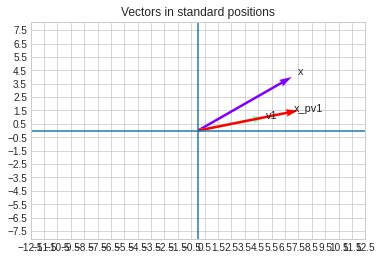

In [ ]:
# Projection of a vector on to the direction of another vector
x = np.array([7, 4]) # a vector which we want to project
v1 = np.array([5, 1]) # a vector on to which we want to project
v2 = np.array([1, 3])

v1_normalized = v1 / np.linalg.norm(v1) # direction of v1
scalar_projection = np.dot(v1_normalized, x) # shadow length
vector_projection = scalar_projection * v1_normalized # shadow length x direction

#v2_normalized = v2 / np.linalg.norm(v2) # direction of v2
#scalar_projection = np.dot(v2_normalized, x) # shadow length
#vector_projection = scalar_projection * v2_normalized # shadow length x direction

print('Shadow length (scalar projection) = %f'%(scalar_projection))
print('Vector projection')
print(vector_projection)

plotVectors(np.array([x, v1, vector_projection]), ['x', 'v1', 'x_pv1'])
#plotVectors(np.array([v1, v1_normalized]), ['v1', 'v1n'])
#plotVectors(np.array([x, v1_normalized, v2_normalized, vector_projection]), ['x', 'v1n', 'v2n', 'vp'])


In [ ]:
# Check if v1 and v2 are linearly independent
x1, x2 = sp.symbols('x1, x2')
A = sp.Matrix([[5, 1, 0], [1, 3, 0]])
print(sp.linsolve(A, (x1, x2)))

{(0, 0)}


1.5689290811054724
3.1622776601683795
[-0.53846154  2.69230769]


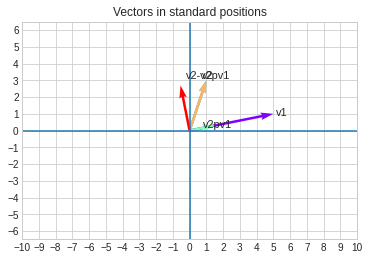

In [ ]:
#v2 = 2*v1
print(np.dot(v1_normalized, v2))
print(np.linalg.norm(v2))
print(v2 - np.dot(v1_normalized, v2)*v1_normalized)
plotVectors(np.array([v1, v2, np.dot(v1_normalized, v2)*v1_normalized, v2, v2 - np.dot(v1_normalized, v2)*v1_normalized]),
            ['v1', 'v2', 'v2pv1', 'v2-v2pv1'])

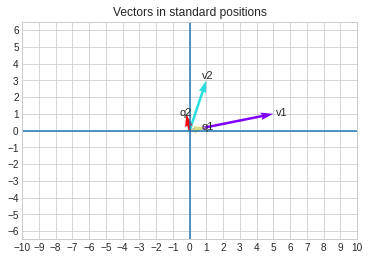

In [ ]:
# Gram-Schmidt to build an orthonormal basis from v1 and v2
q1 = v1 / np.linalg.norm(v1)
q2 = (v2 - (np.dot(q1, v2)*q1))/np.linalg.norm(v2 - (np.dot(q1, v2)*q1))
plotVectors(np.array([v1, v2, q1, q2]), ['v1', 'v2', 'q1', 'q2'])

{(6/7, 19/7)}
8.629110 7.452413



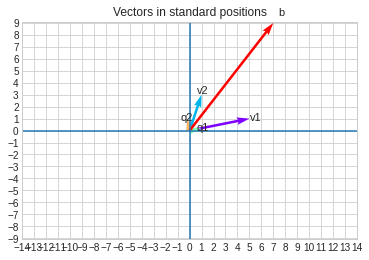

In [ ]:
b = np.array([7, 9])
q1 = v1 / np.linalg.norm(v1)
q2 = (v2 - (np.dot(q1, v2)*q1))/np.linalg.norm(v2 - (np.dot(q1, v2)*q1))
plotVectors(np.array([v1, v2, q1, q2, b]), ['v1', 'v2', 'q1', 'q2', 'b'])

# b = ? * v1 + ? * v2
print(sp.linsolve(sp.Matrix([[5, 1, 7], [1, 3, 9]]), x1, x2))
# b = ? * q1 + ? * q2
print('%f %f\n'%(np.dot(b, q1), np.dot(b, q2)))

In [ ]:
x1, x2, x3 = sp.symbols('x1, x2, x3')
# Check if the vectors [1,2,3,4], [1,1,0,0], [0,0,1,1] form a linearly independent set
print(sp.linsolve(sp.Matrix([[1, 1, 0, 0], [2, 1, 0, 0], [3, 0, 1, 0], [4, 0, 1, 0]]),
                  x1, x2, x3))
# Build an orthonormal basis using Gram-Schmidt
v1 = np.array([1,2,3,4])
v2 = np.array([1,1,0,0])
v3 = np.array([0,0,1,1])

q1 = v1 / np.linalg.norm(v1)
q2 = (v2 - np.dot(q1, v2)*q1) / np.linalg.norm(v2 - np.dot(q1, v2)*q1)
q3 = (v3 -(np.dot(q1, v3)*q1 + np.dot(q2, v3)*q2))/ np.linalg.norm(v3 -(np.dot(q1, v3)*q1 + np.dot(q2, v3)*q2))

# Check
print(np.dot(q1, q2))
print(np.dot(q1, q3))
print(np.dot(q2, q3))
print(np.linalg.norm(q1))

{(0, 0, 0)}
1.1102230246251565e-16
4.996003610813204e-16
-6.938893903907228e-17
0.9999999999999999


In [ ]:
dfPatient = pd.DataFrame({'Hear Rate': [75, 76, 74, 72],
                          'BP': [125, 140, 130, 110],
                          'Temp': [37.5, 37, 37, 39]})
print(dfPatient)

A = dfPatient.values

#print(A)
#print(A.shape)

e1 = np.array([1, 0, 0])
e2 = np.array([0, 1, 0])
e3 = np.array([0, 0, 1])

# Matrix-vector product A*e1
print(np.dot(A, e1))

# Linear combination of columns of A
print(e1[0]*A[:, 0] + e1[1]*A[:, 2] + e1[2]*A[:, 2])

# Dot product with the rows of A
np.array([np.dot(e1, A[0, :]), np.dot(e1, A[1, :]), np.dot(e1, A[2, :]), np.dot(e1, A[3, :])])

   Hear Rate   BP  Temp
0         75  125  37.5
1         76  140  37.0
2         74  130  37.0
3         72  110  39.0
[75. 76. 74. 72.]
[75. 76. 74. 72.]


array([75., 76., 74., 72.])